#### **01-Modeling_&_Evaluation**
#### Project name: **Telecom Customer Churn Prediction**
#### Author: **Fausto Pucheta Fortin**

#### **Introduction:** 
This notebook is the continuation of 01-Feature_Engineer. \
Previously, key techniques such as binning, normalization, standardization, and feature selection were performed. Now, we're all set for splitting and training some machine learning algorithms, specifically: 
- *Decision Tree Classifier*
- *Random Forest*
- *XGBoost*. \
Later in the notebook, each algorithm's performance will be evaluated using different techniques according to the business problem. In this case, we'll use: 
- *Accuracy Score*
- *Recall*
- *F-1 Score*
- *ROC AUC*

#### **Tasks:**
1. Data Splitting

2. Save Training and Test data

3. Modeling and Evaluation (Choosing the best model):
    1. Training Algorithms (Decision Tree Classifier, Random Forest, and XGBoost)
    2. Visualizing Scores.

5. Feature Importance Analysis
    1. Feature Importance Scores
    2. Partial Dependency Plots (PDPs)
    3. SHAP (Shapley Additive exPlanations) Values
    
#### **Findings:**


#### **Further steps:**


In [1]:
import sys
sys.path.append('../src/functions')
from tqdm.notebook import tqdm

# EDA functions
from plot_functions import *

# Analysis libraries
import numpy as np
import pandas as pd
import pickle

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot Functions
from plot_functions import *

# Data Splitting and Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
import joblib

# Model Evaluation
import shap


# Import data frame
#df = pd.read_pickle("../data/processed/modeling_df.pkl")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



1. Data Splitting

In [7]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
print("Training set distribution:")
print(y_train.value_counts())

print("Testing set distribution:")
print(y_test.value_counts())

Training set distribution:
Churn
1.0    196149
0.0    157495
Name: count, dtype: int64
Testing set distribution:
Churn
1.0    84343
0.0    67219
Name: count, dtype: int64


2. Save Training and Test data

In [9]:
# Save the training data
with open('../data/processed/train_df/X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)

with open('../data/processed/train_df/y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)

# Save the testing data
with open('../data/processed/test_df/X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)

with open('../data/processed/test_df/y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

In [3]:
X_train, y_train, X_test, y_test = (pd.read_pickle("../data/processed/train_df/X_train.pkl"),
                                    pd.read_pickle("../data/processed/train_df/y_train.pkl"),
                                    pd.read_pickle("../data/processed/test_df/X_test.pkl"),
                                    pd.read_pickle("../data/processed/test_df/y_test.pkl"),
                                    )

3. Modeling (Choosing the best model)

In [9]:
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

def train_algorithms(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Save model
        joblib.dump(model, f"../models/{model_name}_joblib")
        
        # Training set performance
        model_train_accuracy_score = accuracy_score(y_train, y_train_pred)
        model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
        model_train_recall_score = recall_score(y_train, y_train_pred)
        model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)
        
        # Test set performance
        model_test_accuracy_score = accuracy_score(y_test, y_test_pred)
        model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
        model_test_recall_score = recall_score(y_test, y_test_pred)
        model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)
        
        # Print results
        print(model_name)
        
        print("Model performance for Training set")
        print("- Accuracy Score: {:.4f}".format(model_train_accuracy_score))
        print("- F1 Score: {:.4f}".format(model_train_f1_score))
        print("- Recall Score: {:.4f}".format(model_train_recall_score))
        print("- ROC & AUC Score: {:.4f}".format(model_train_roc_auc_score))
        
        print("-" * 35)
        
        print("Model performance for Test set")
        print("- Accuracy Score: {:.4f}".format(model_test_accuracy_score))
        print("- F1 Score: {:.4f}".format(model_test_f1_score))
        print("- Recall Score: {:.4f}".format(model_test_recall_score))
        print("- ROC & AUC Score: {:.4f}".format(model_test_roc_auc_score))

        print("=" * 35)
        
        plot_scores(model_name, model_train_accuracy_score, "Accuracy Scores")

Decision Tree Classifier
Model performance for Training set
- Accuracy Score: 0.9974
- F1 Score: 0.9974
- Recall Score: 0.9967
- ROC & AUC Score: 0.9975
-----------------------------------
Model performance for Test set
- Accuracy Score: 0.8647
- F1 Score: 0.8648
- Recall Score: 0.8724
- ROC & AUC Score: 0.8637


TypeError: 'numpy.float64' object is not iterable

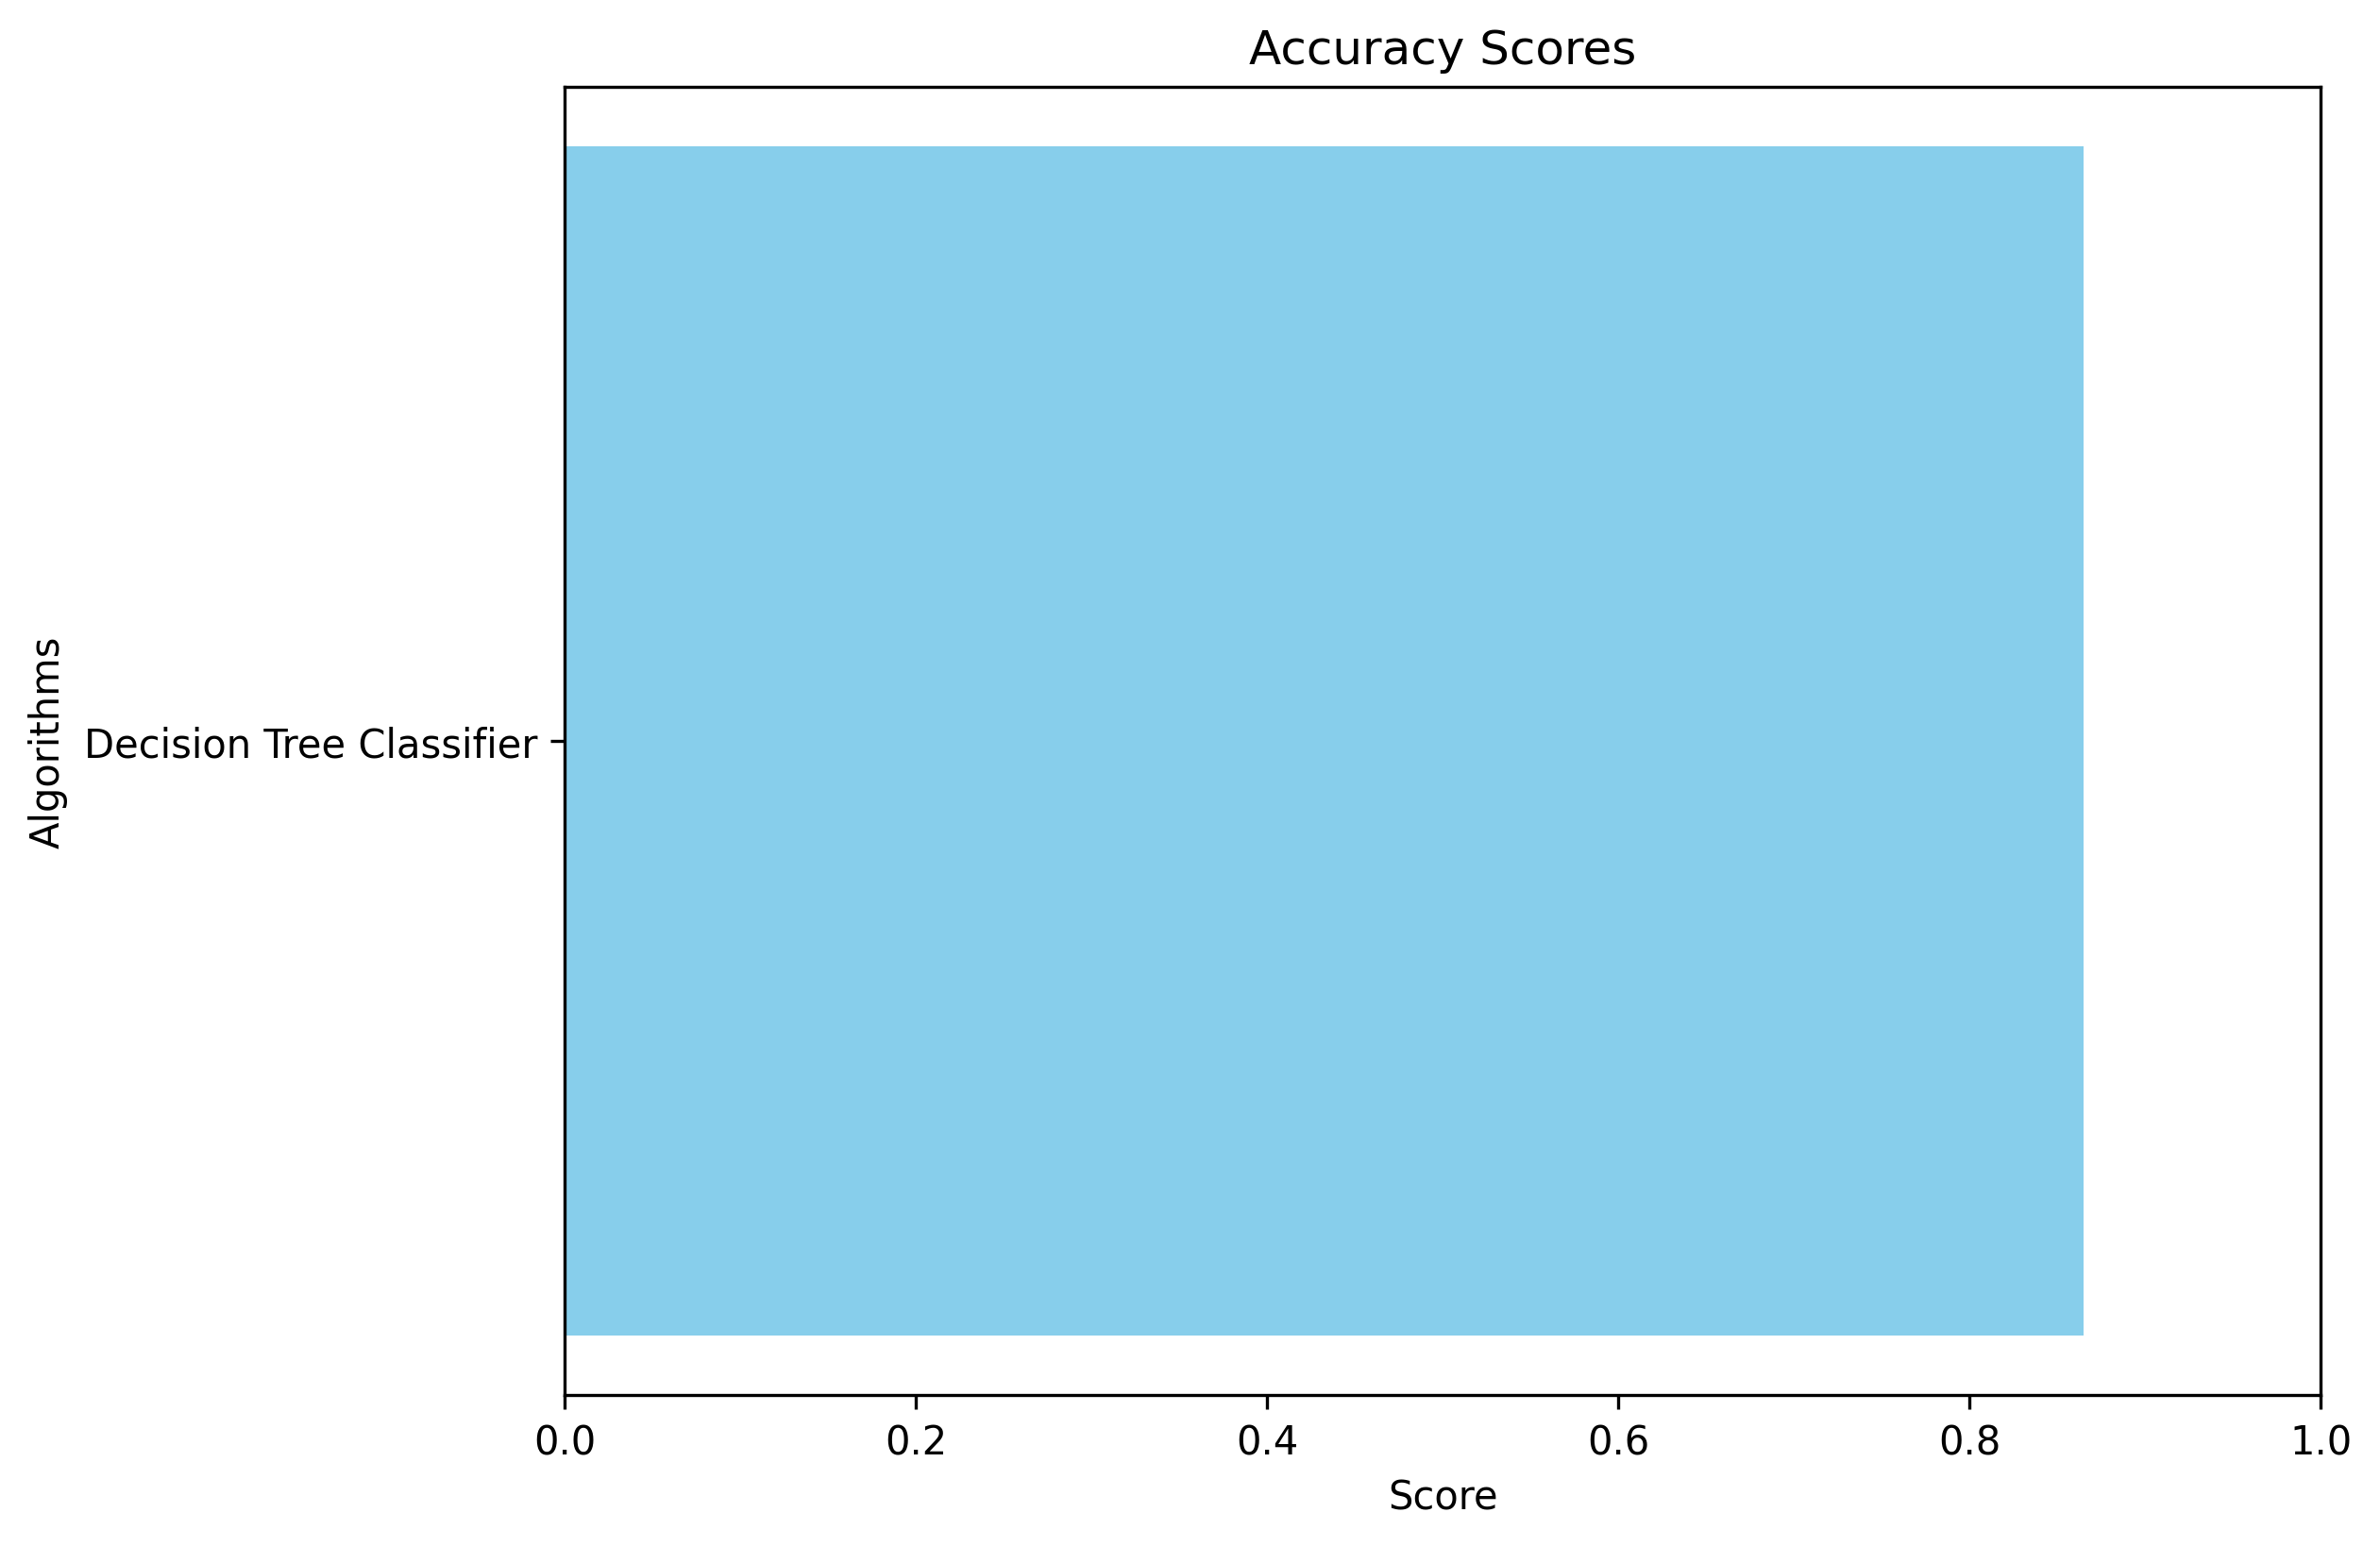

In [4]:
decision_tree_clf = joblib.load("../models/Decision Tree Classifier_joblib")
rf_clf = joblib.load("../models/Random Forest_joblib")
xgb_clf = joblib.load("../models/XGBoost_joblib")

models = {
    "Decision Tree Classifier": decision_tree_clf, 
    "Random Forest": rf_clf, 
    "XGBoost": xgb_clf
    }

for model_name, model in models.items():

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy_score = accuracy_score(y_train, y_train_pred)
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_recall_score = recall_score(y_train, y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy_score = accuracy_score(y_test, y_test_pred)
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_recall_score = recall_score(y_test, y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

    # Test Scores
    
    
    # Return Scores
    return test_scores

    
        

4. Evaluation:

4.   1. Accuracy Score

In [5]:
# Calculate accuracy_score for Decision Tree Classifier
clf_accuracy_score = accuracy_score(y_test, clf_y_pred)

# Calculate accuracy_score for Random Forest
rf_accuracy_score = accuracy_score(y_test, rf_y_pred)

# Calculate accuracy_score for XGBoost
xgb_accuracy_score = accuracy_score(y_test, xgb_y_pred)

accuracy_scores = [clf_accuracy_score, rf_accuracy_score, xgb_accuracy_score]

# Algorithms
algorithms = ['Decision Tree', 'Random Forest', 'XGBoost']

# Plot H Bar Plots
plot_scores(algorithms, accuracy_scores, "Accuracy Scores")

print("Accuracy Score:")
print(f"Decision Tree Classifier:", clf_accuracy_score)
print(f"Random Forest:", rf_accuracy_score)
print(f"XGBoost:", xgb_accuracy_score)

NameError: name 'clf_y_pred' is not defined

4.    2. Recall

Recall Score:
Decision Tree Classifier: 0.8730185077599801
Random Forest: 0.93062850503302
XGBoost: 0.9684384003414629


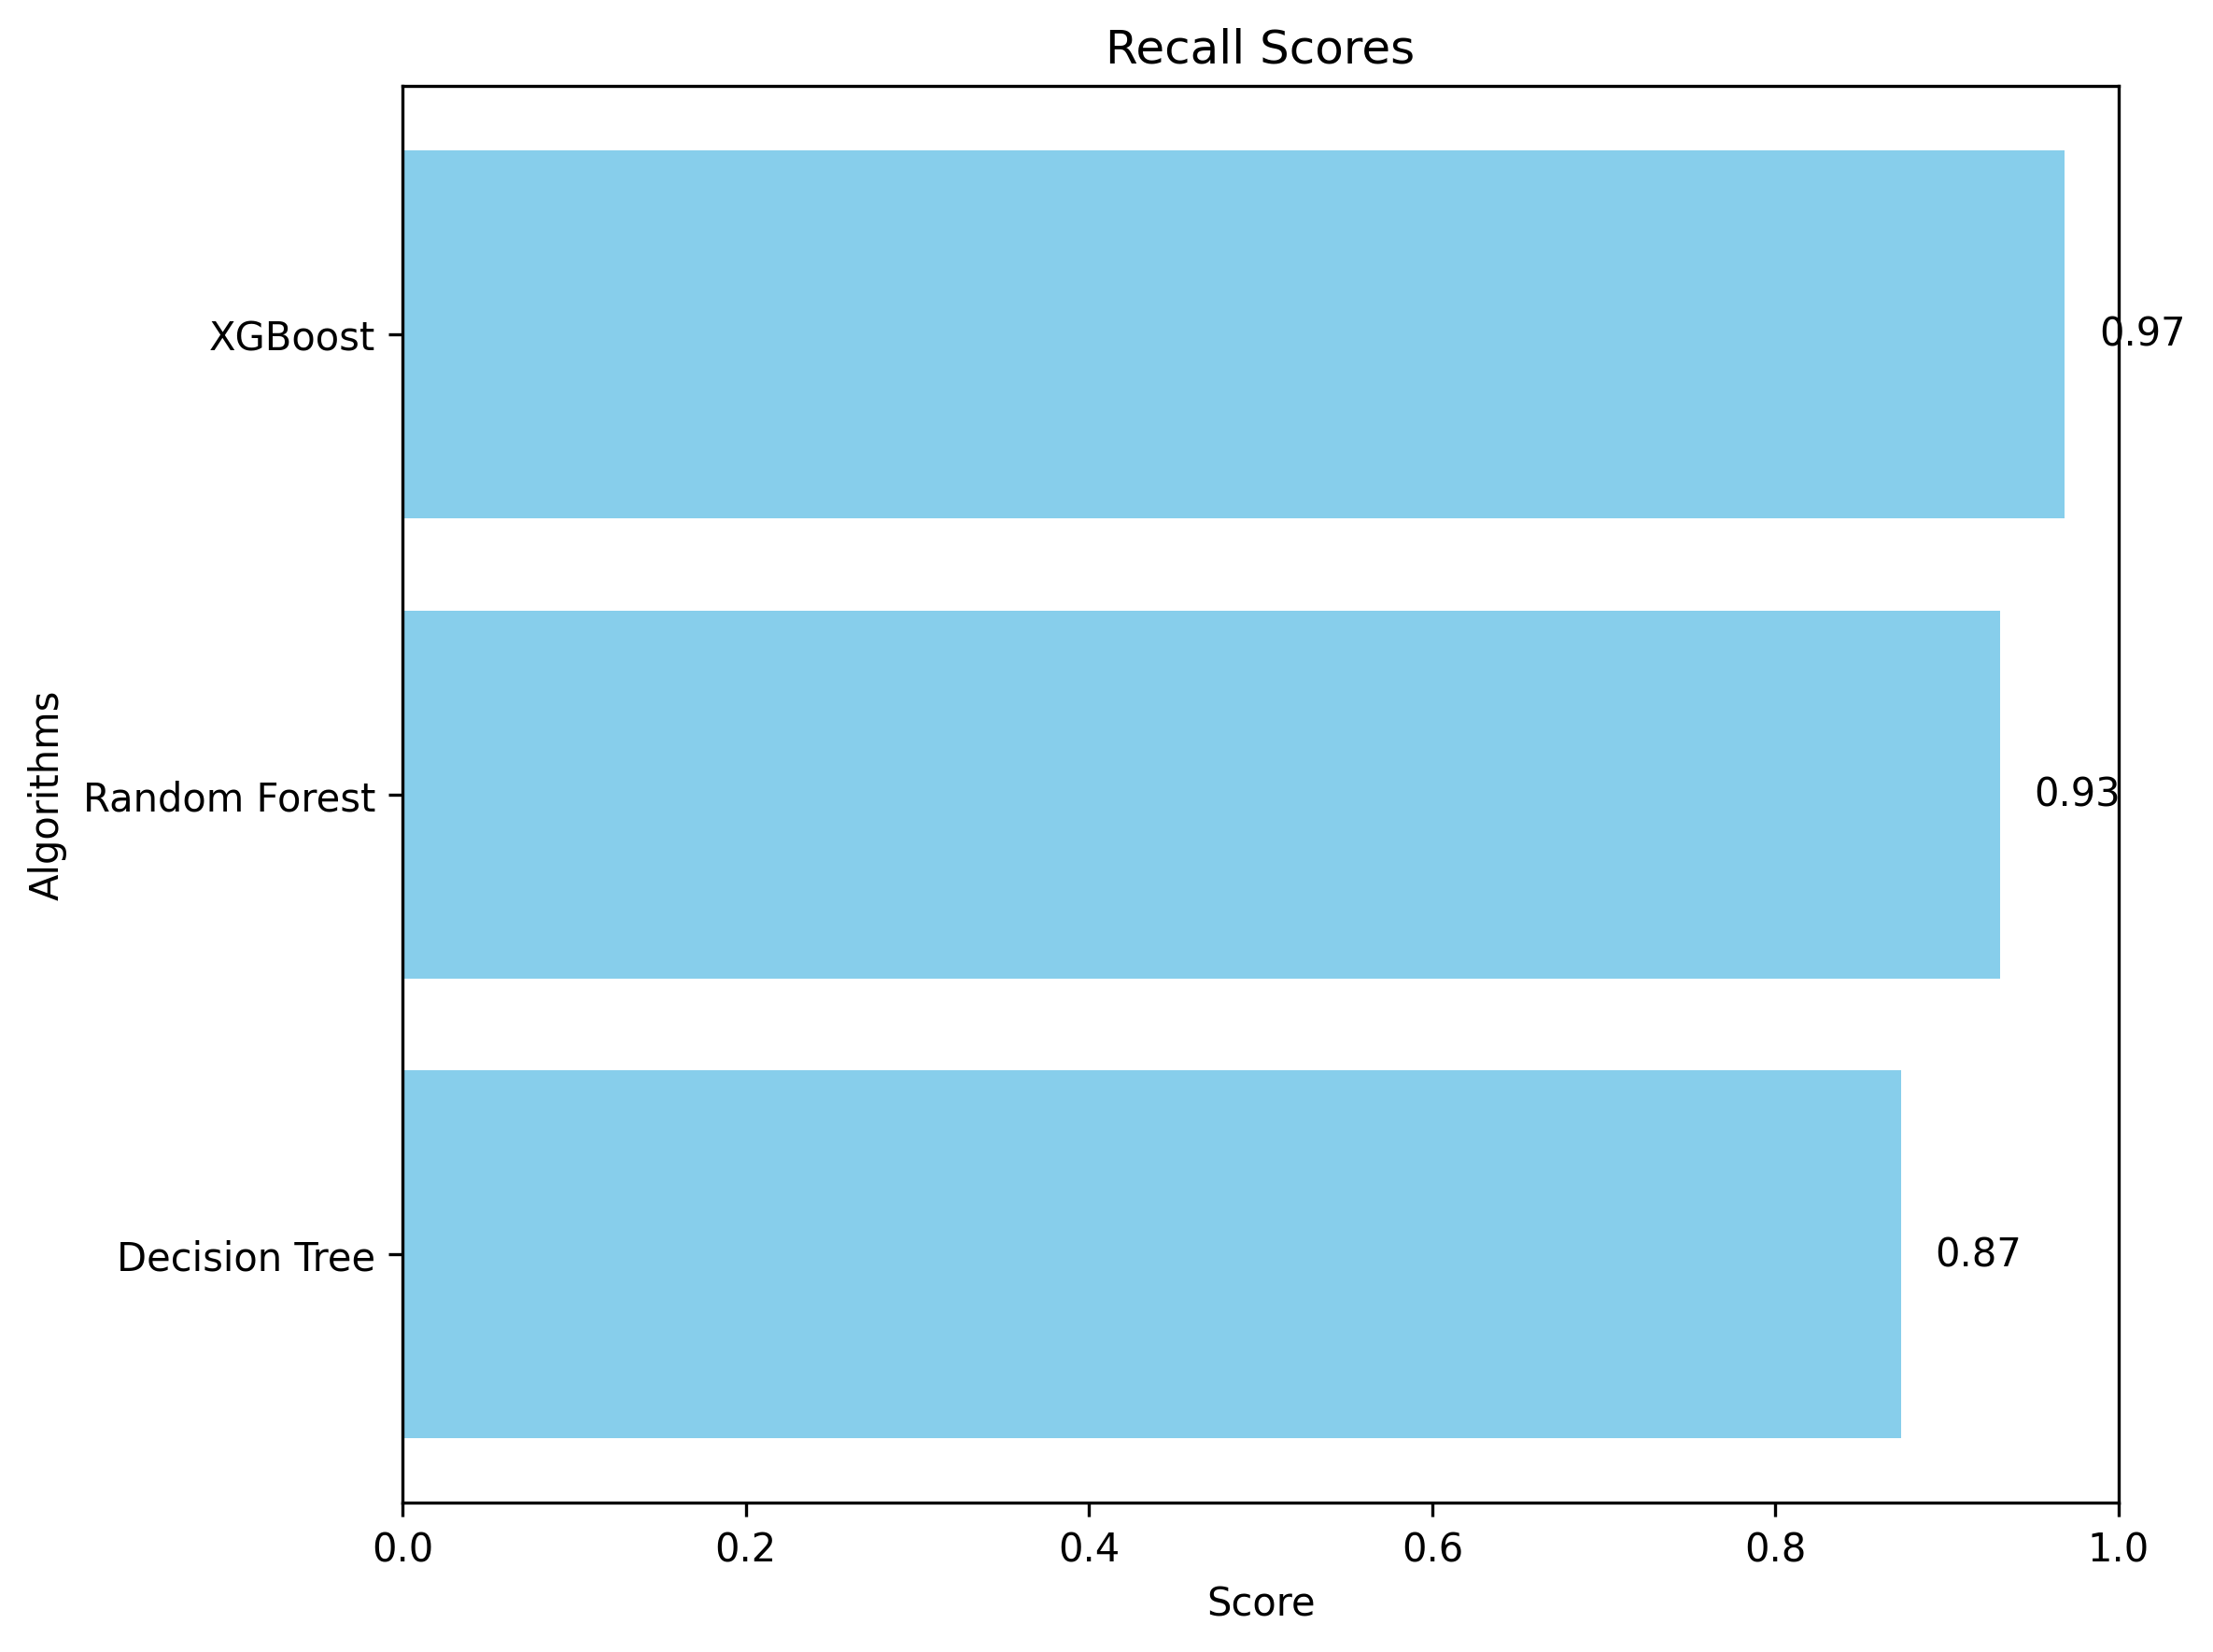

In [17]:
# Calculate Recall for Decision Tree Classifier
clf_recall = recall_score(y_test, clf_y_pred)

# Calculate Recall for Random Forest
rf_recall = recall_score(y_test, rf_y_pred)

# Calculate Recall for XGBoost
xgb_recall = recall_score(y_test, xgb_y_pred)

recall_scores = [clf_recall, rf_recall, xgb_recall]

# Plot H Bar Plot Scores
plot_scores(algorithms, recall_scores, "Recall Scores")


print("Recall Score:")
print("Decision Tree Classifier:", clf_recall)
print("Random Forest:", rf_recall)
print("XGBoost:", xgb_recall)

4. 3. F1 Score

F1-Score:
Decision Tree Classifier: 0.8780362743110625
Random Forest: 0.9069711010711439
XGBoost: 0.9307580548671054


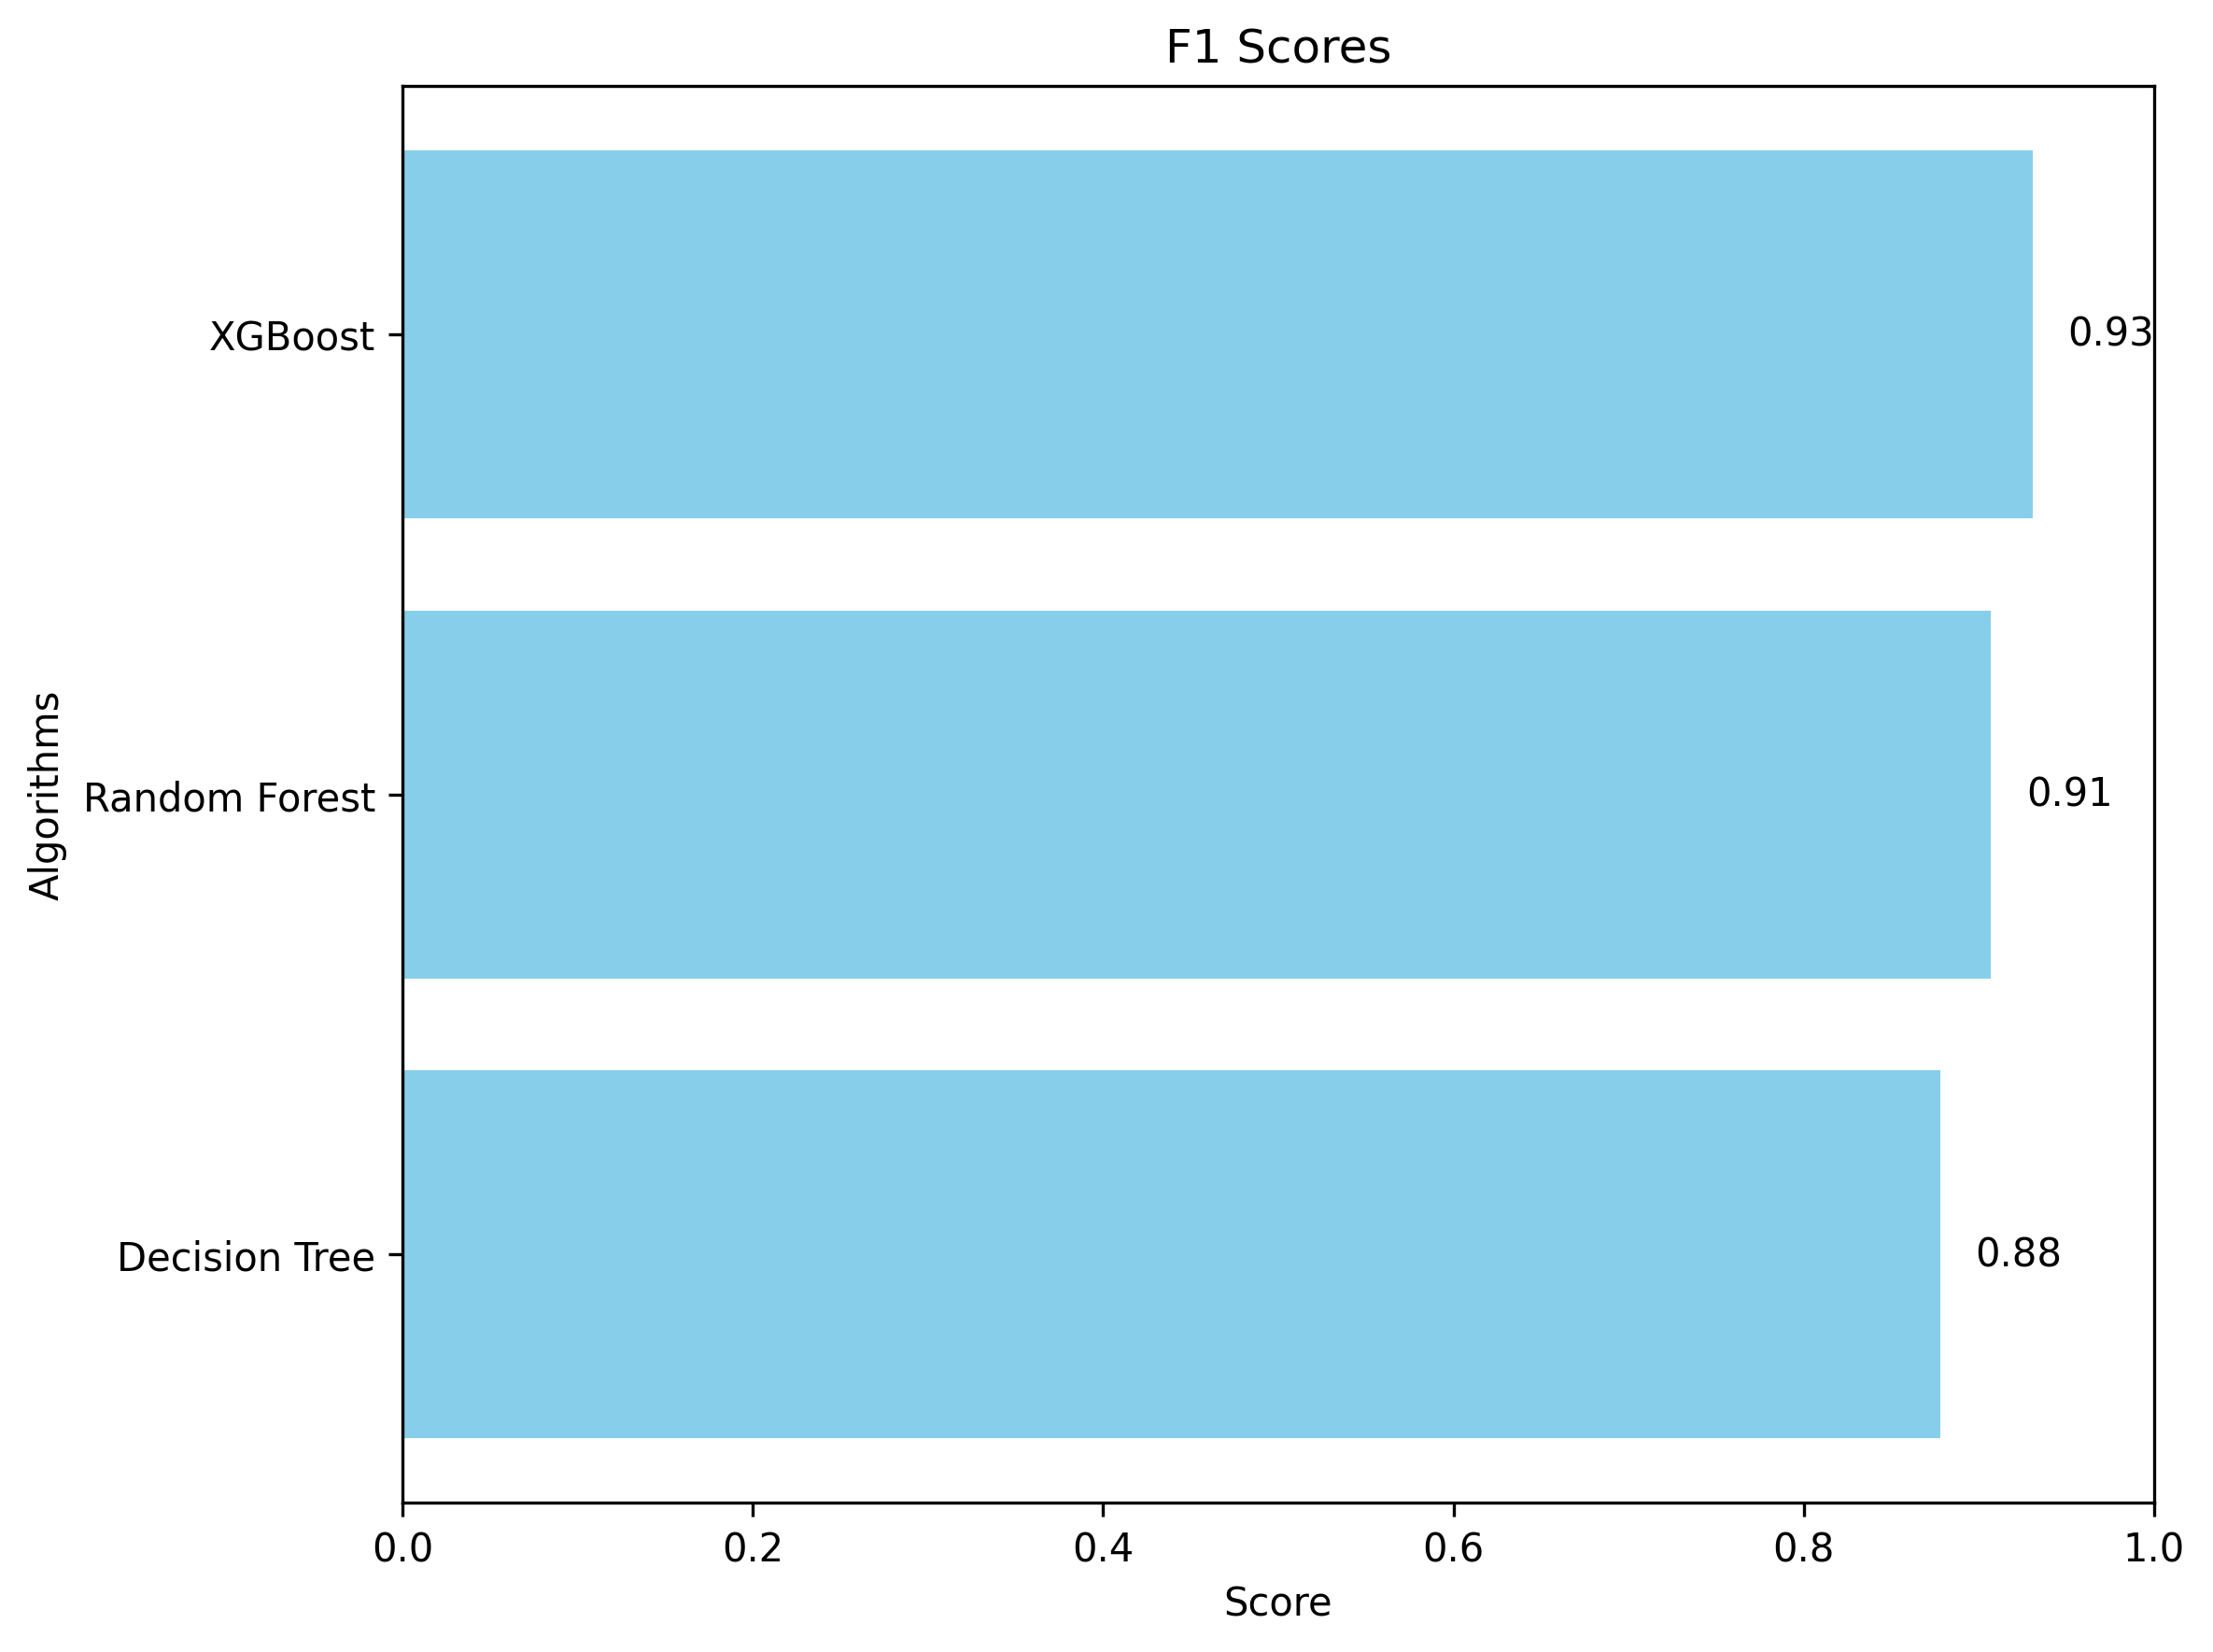

In [18]:
# Calculate F1 Score for Decision Tree Classifier
clf_f1 = f1_score(y_test, clf_y_pred)

# Calculate F1 Score for Random Forest
rf_f1 = f1_score(y_test, rf_y_pred)

# Calculate F1 Score for XGBoost
xgb_f1 = f1_score(y_test, xgb_y_pred)

f1_scores = [clf_f1, rf_f1, xgb_f1]

# Plot H Bar Plot for each score
plot_scores(algorithms, f1_scores, "F1 Scores")

print("F1-Score:")
print("Decision Tree Classifier:", clf_f1)
print("Random Forest:", rf_f1)
print("XGBoost:", xgb_f1)

4. 4. ROC and AUC

ROC AUC Score:
Decision Tree Classifier: 0.8640148698516648
Random Forest: 0.8890634900832695
XGBoost: 0.9136216012775614


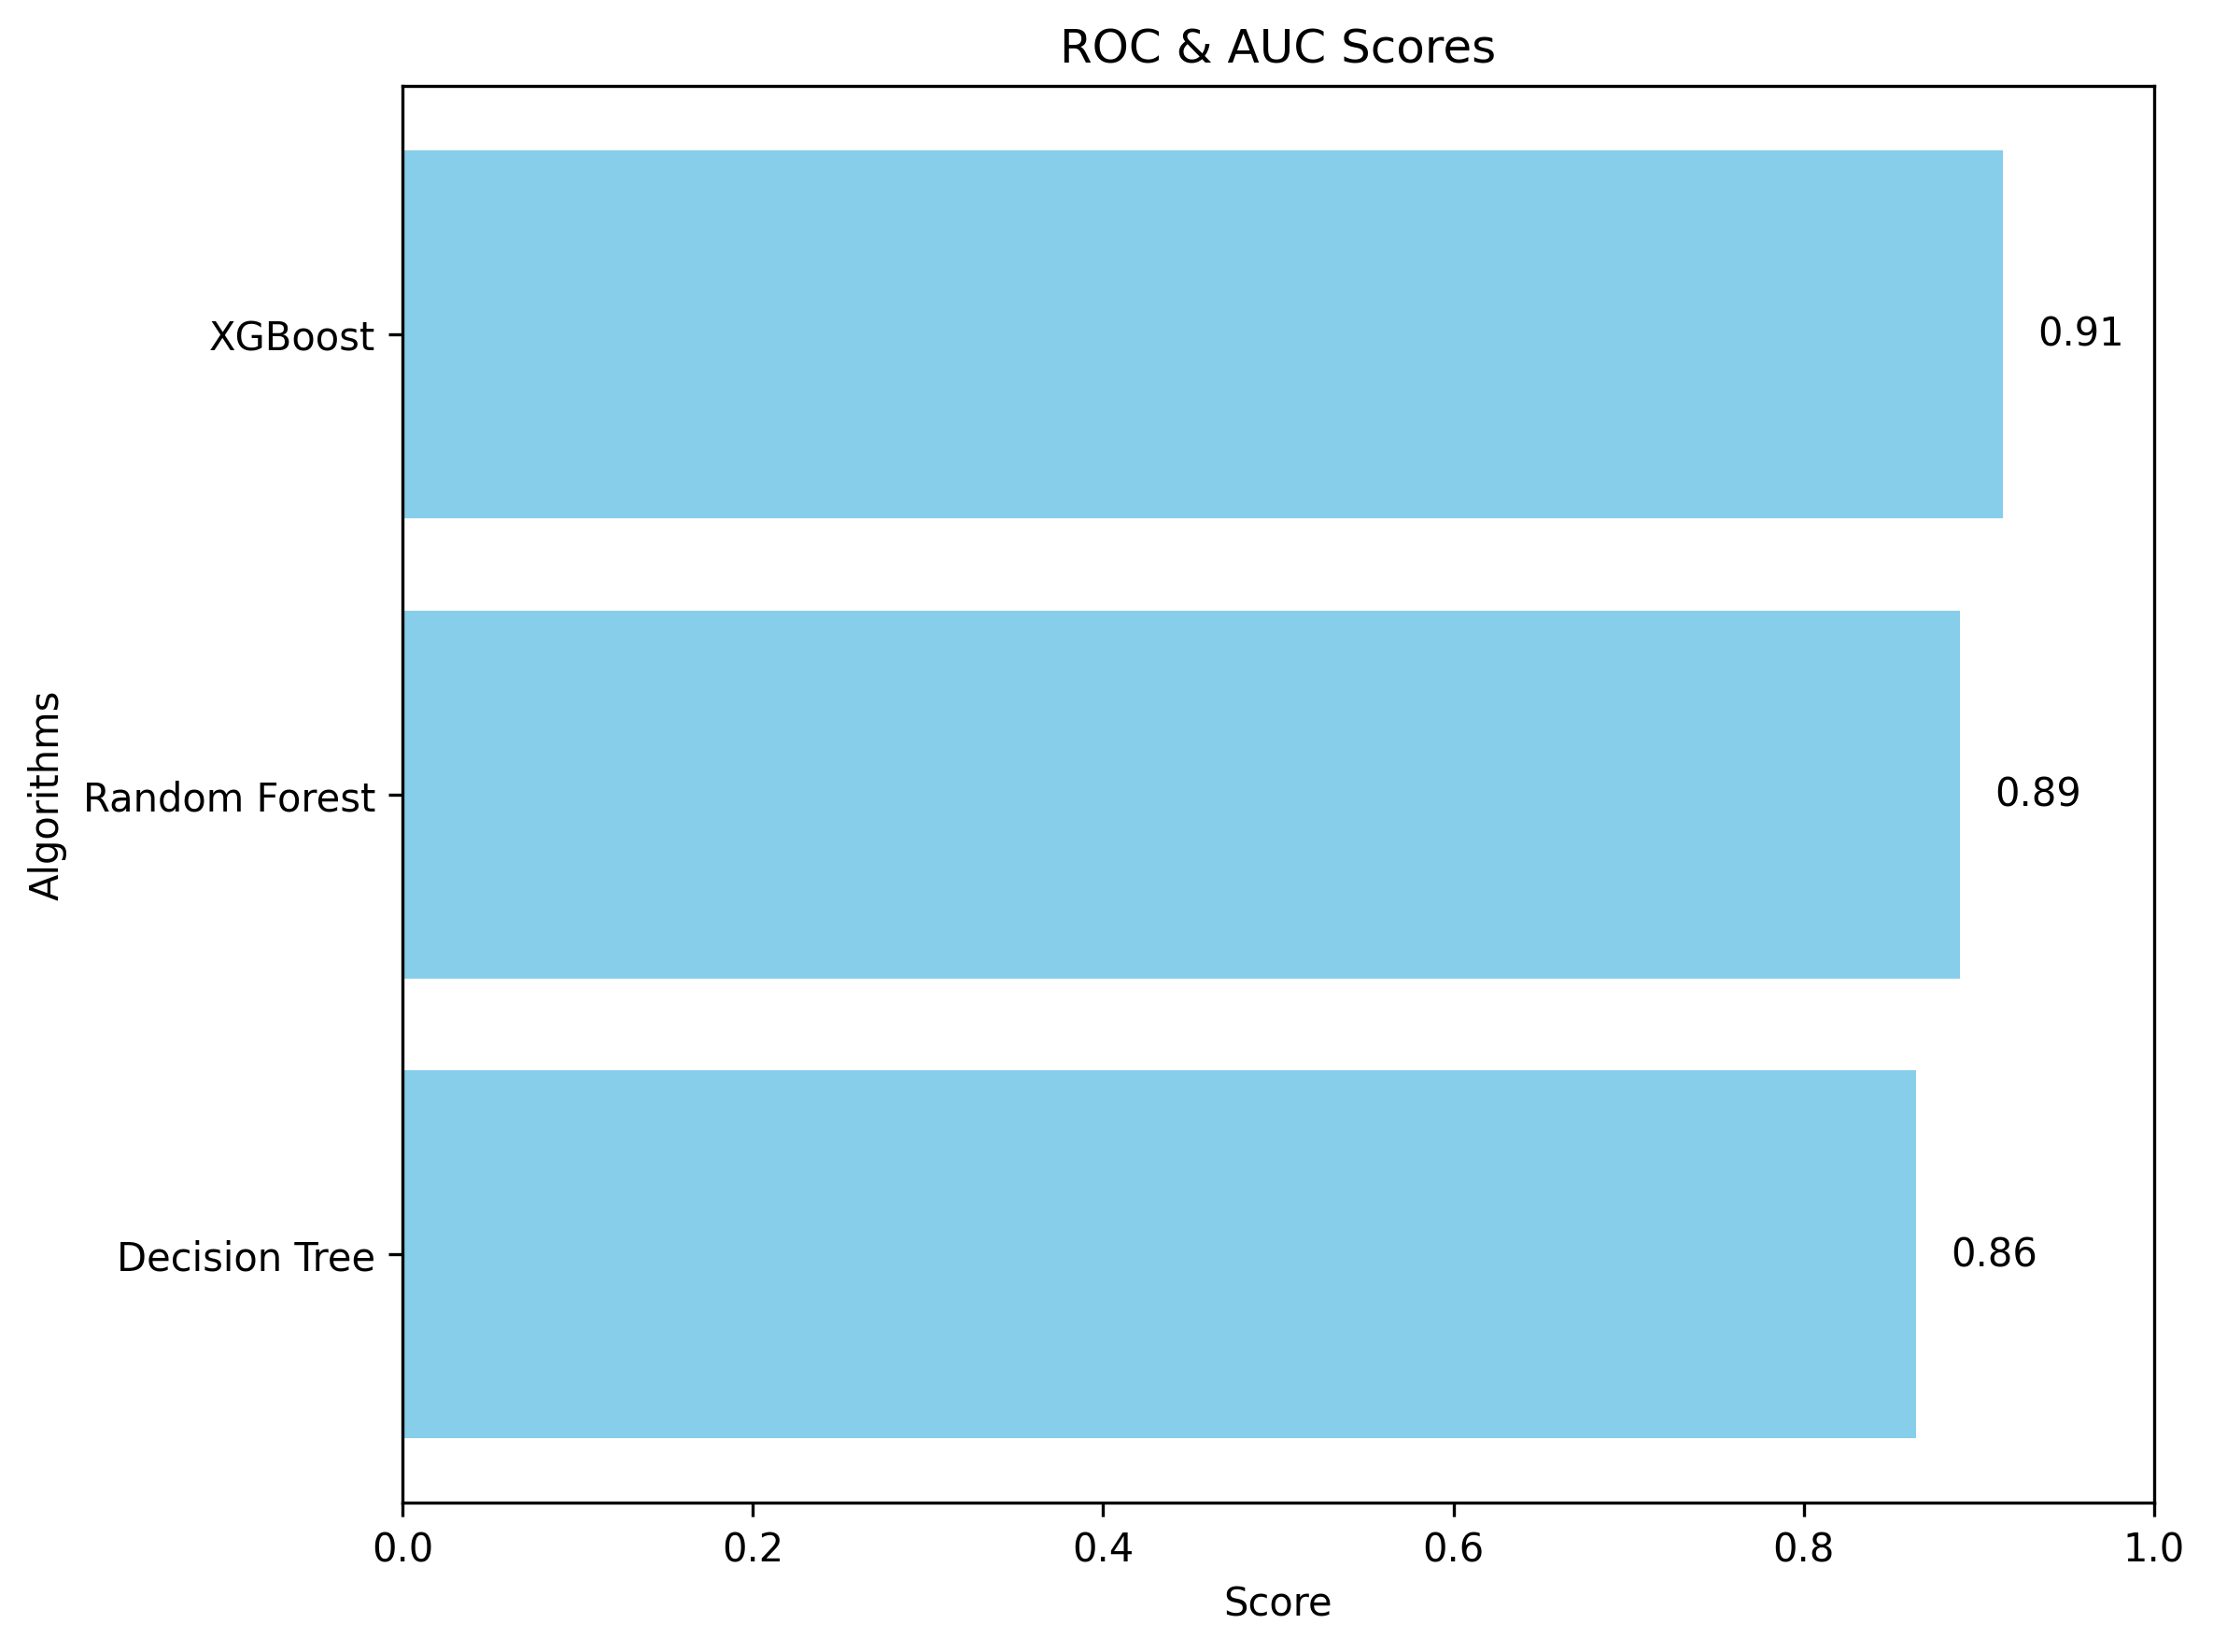

In [19]:
# Calculate ROC and AUC for Decision Tree Classifier
clf_roc_auc = roc_auc_score(y_test, clf_y_pred)

# Calculate ROC and AUC for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)

# Calculate ROC and AUC for XGBoost
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred)

roc_auc_scores = [clf_roc_auc, rf_roc_auc, xgb_roc_auc]

# Plot H Bar Plot for each score
plot_scores(algorithms, roc_auc_scores, "ROC & AUC Scores")

print("ROC AUC Score:")
print("Decision Tree Classifier:", clf_roc_auc)
print("Random Forest:", rf_roc_auc)
print("XGBoost:", xgb_roc_auc)

5. Feature Importance Analysis
    1. Feature Importance Score
    2. Partial Dependence Plots (PDPs)
    3. SHAP (Shapley Additive exPlanations)

5. 1. Feature Importance Score

In [20]:
feature_names = X_train.columns

# Decision Tree Classifier
clf_feature_importance = clf.feature_importances_

# Random Forest
rf_feature_importance = rf_classifier.feature_importances_

# XGBoost
xgb_feature_importance = xgb_classifier.feature_importances_

# Classifiers Dict
classifiers = {'Decision Tree Regressor':clf, 'Random Forest':rf_classifier, 'XGBoost': xgb_classifier}

<module 'matplotlib.pyplot' from 'c:\\Users\\Fausto\\Telecom-Customer-Churn-Project\\churnvenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

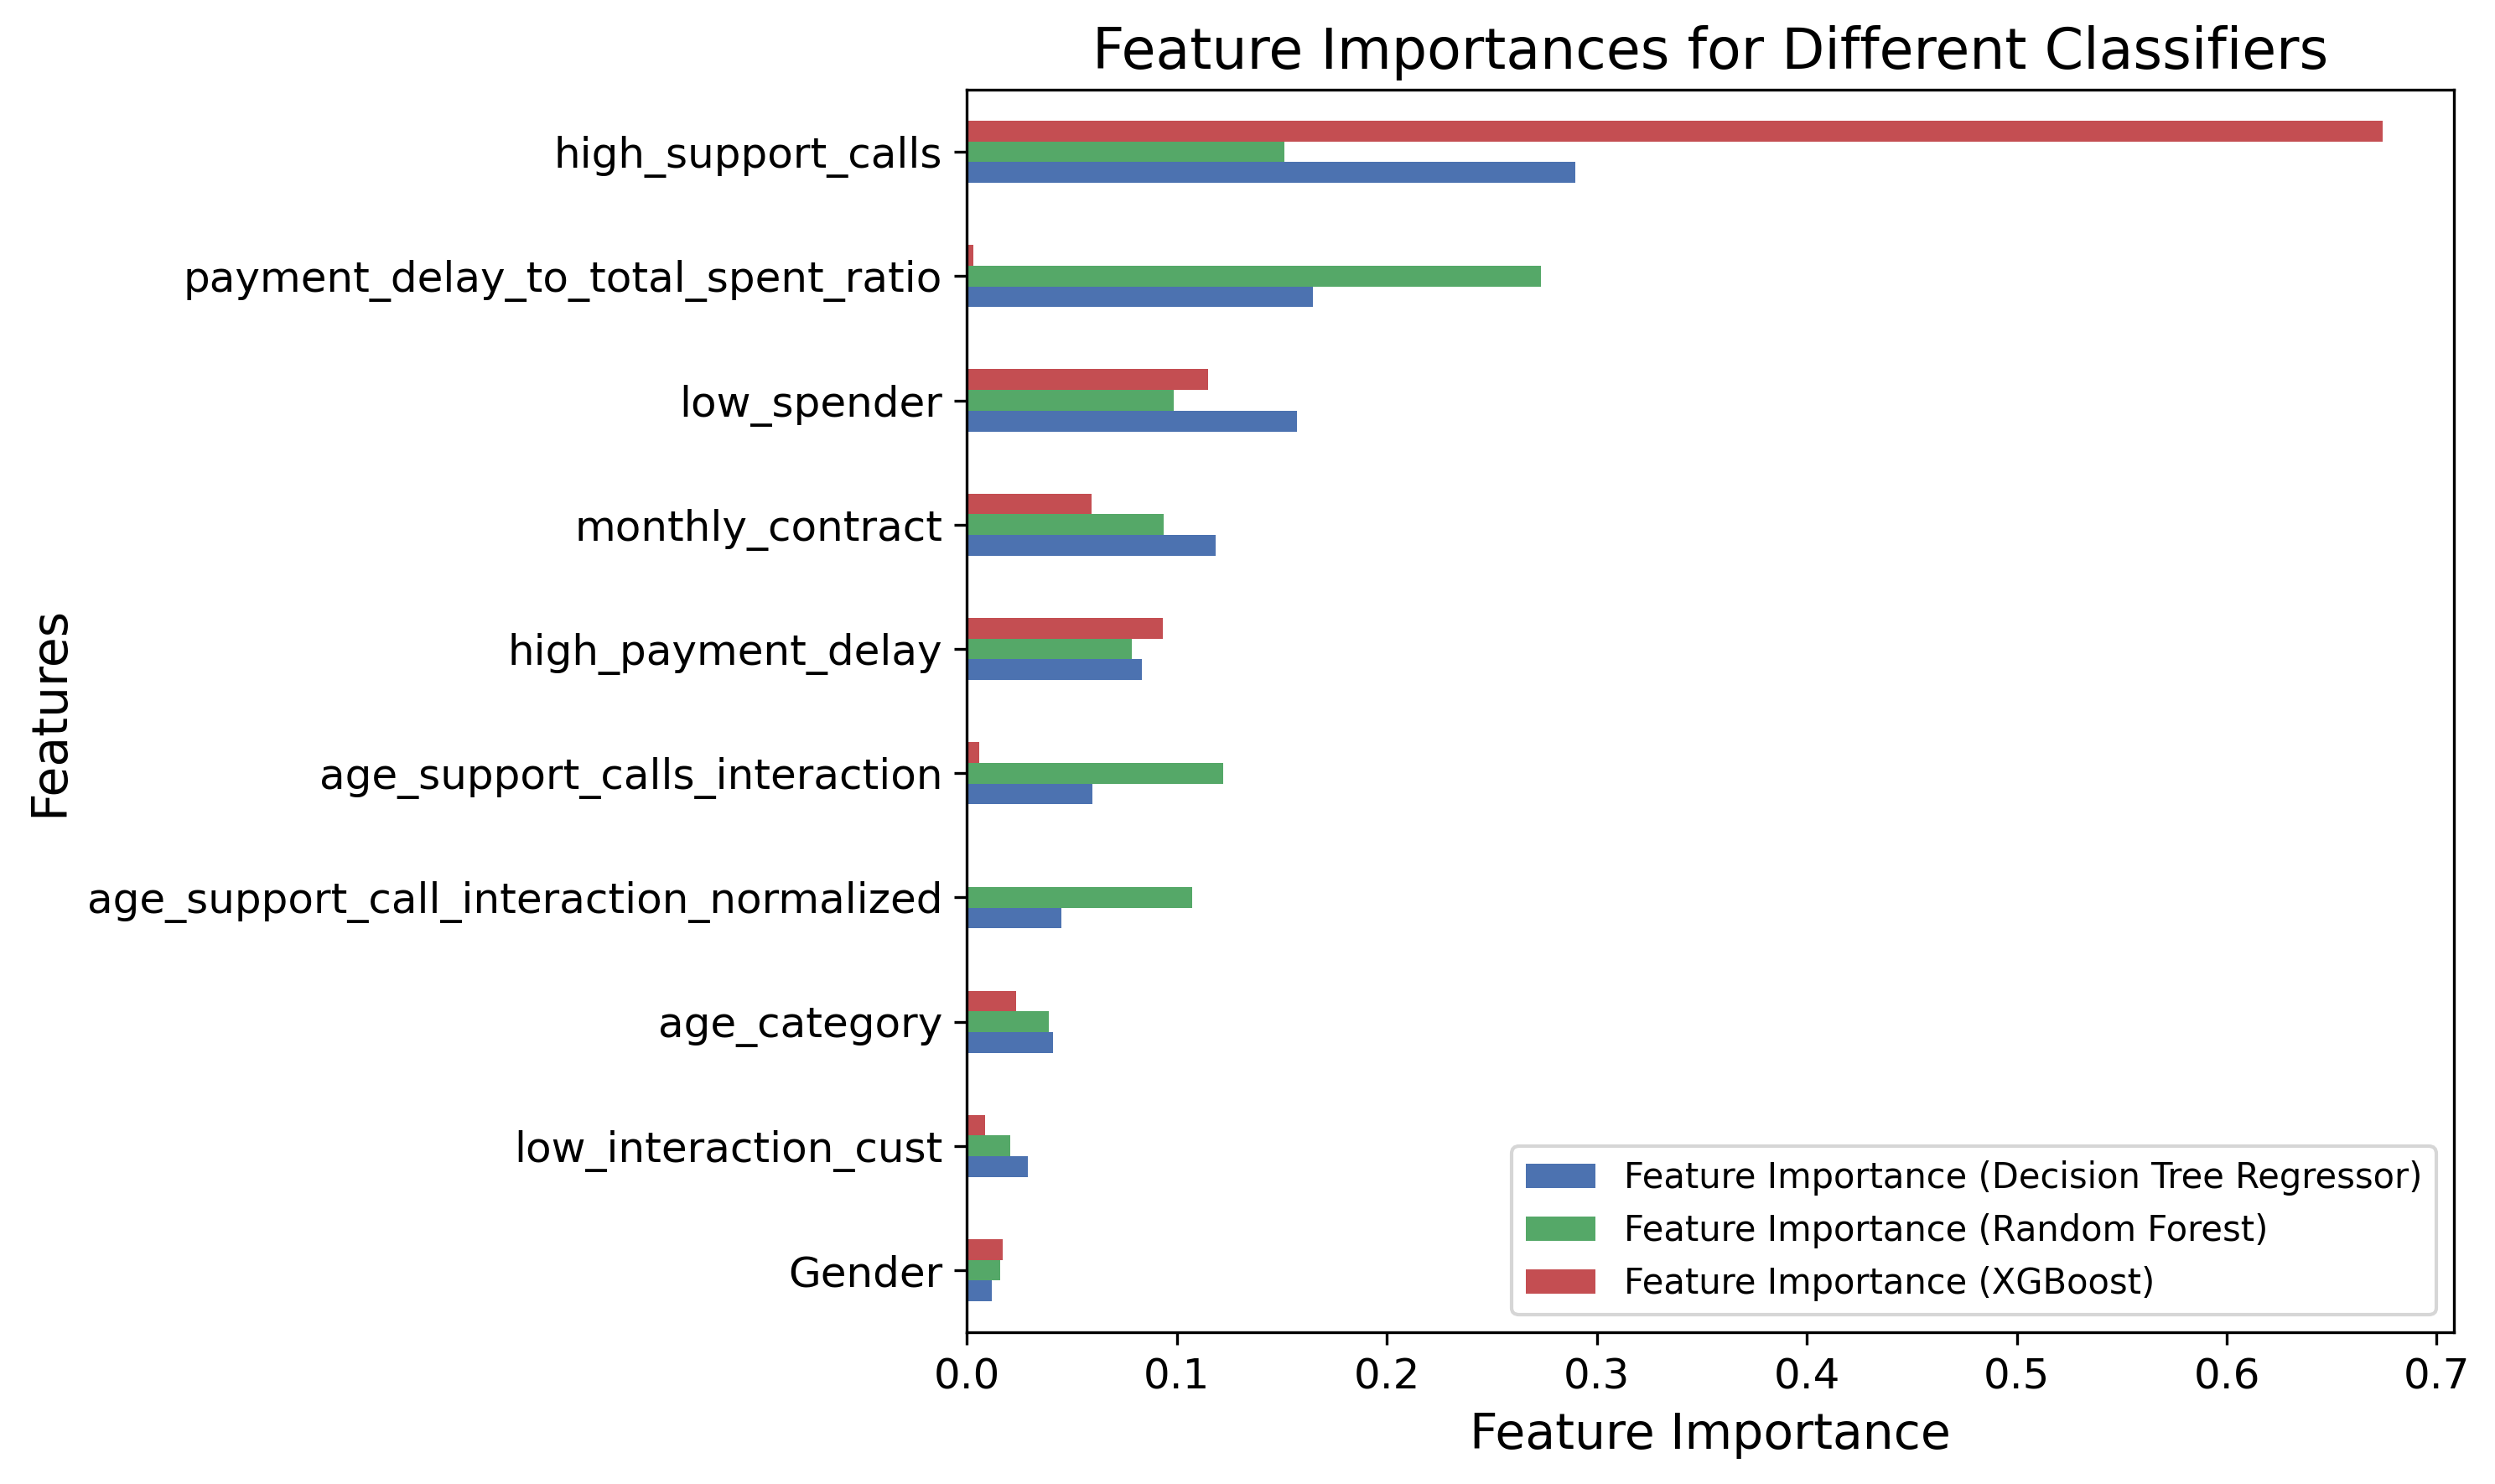

In [ ]:
plot_feature_importances(classifiers, X_train)

In [6]:
decision_tree_clf = joblib.load("../models/Decision Tree Classifier_joblib")
rf_clf = joblib.load("../models/Random Forest_joblib")
xgb_clf = joblib.load("../models/XGBoost_joblib")



Waterfall Plot